In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [5]:
bias=200
X, y ,coef = make_regression(n_features=1, bias=bias, noise=10, coef=True, random_state=42)


In [6]:
X.shape, y.shape,f" M =  {coef} and C = {bias}"

((100, 1), (100,), ' M =  41.7411003148779 and C = 200')

In [7]:
# y=mx+c formula 
y_gen = coef * X + bias

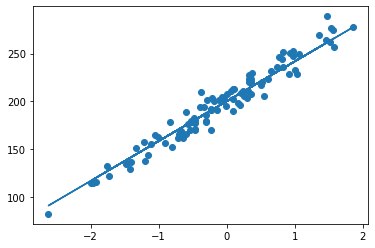

In [8]:
plt.scatter(X, y)
plt.plot(X, y_gen)

In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
model = LinearRegression()

In [11]:
err=model.fit(X , y)

In [12]:
model.coef_ , model.intercept_

(array([44.43716999]), 201.16511532052695)

In [13]:
model.predict(X), 

(array([242.54856828, 205.03324069, 154.16343497, 215.12937746,
        179.87196826, 229.94656099, 180.57214453, 225.27494821,
        228.34627855, 245.7592773 , 237.68813662, 269.51110768,
        233.98048027, 191.4035183 , 165.23794765, 205.24270455,
        114.0829209 , 223.9732675 , 246.97981636,  84.75105679,
        223.23768658, 205.47896688, 180.46940309, 241.84299484,
        270.69345143, 266.29439881, 174.47443175, 199.57310753,
        174.42697631, 148.00907822, 217.03418737, 217.86007203,
        212.76567283, 177.62407109, 160.81509512, 209.91307152,
        187.87807486, 217.23519684, 237.71668341, 188.20307058,
        217.22451328, 171.08461732, 268.84425195, 178.13465353,
        190.760002  , 183.74093866, 187.78491921, 172.49781912,
        215.77388427, 210.4464224 , 186.60473681, 201.39234286,
        190.76073156, 266.83854422, 184.05314856, 216.43453967,
        215.88552473, 192.91495581, 190.740727  , 112.84317759,
        215.56648976, 191.13225548, 152.

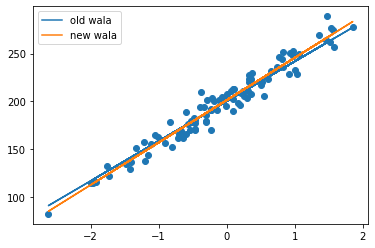

In [14]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="old wala")
plt.plot(X, model.predict(X), label="new wala")
plt.legend()

In [15]:
print(err)

LinearRegression()


In [16]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
    
    # training function i.e. fit
    def fit(self, X, y):
        self._X = X # _X mock behavior like private
        self._y = y.reshape(-1, 1) # do calculations, else it will give error due to some numpy shape
        
        # need to figure out value of coef & intercept
        # step 1: pick these values at random 
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gradient descent
        errors = []
        
        # lets say we do this 50 times
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        # change in coef and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X) # from predict funtion
        
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()


In [17]:
model2=LinearRegCustom(lr=0.1)

In [18]:
error=model2.fit(X, y)
print(error)

[3263424.486590251, 2667289.990873809, 2182016.0194950053, 1786709.7487862173, 1464460.0618376941, 1201571.7424219162, 986948.0468482117, 811592.7364382999, 668208.3148623328, 550871.7637349532, 454772.72580536193, 376002.02367733966, 311380.76444390777, 258322.1802450204, 214719.88253674208, 178857.43684609892, 149335.15363600414, 125010.78672855673, 104951.47137131916, 88394.74987688943, 74716.94824361528, 63407.501900012365, 54048.098480481036, 46295.72301461215, 39868.86629099339, 34536.29863684174, 30107.925530802735, 26427.33364263326, 23365.7103389361, 20816.879844465315, 18693.247869937684, 16922.485837379794, 15444.817647234702, 14210.797683642066, 13179.489610918632, 12316.972414965643, 11595.113846013228, 10990.562535287108, 10483.919081425125, 10059.053731328771, 9702.544236549524, 9403.212310457367, 9151.741053669566, 8940.358925679111, 8762.578457006986, 8612.980029998746, 8487.032797906188, 8380.946234343262, 8291.546967947264, 8216.176508285726]


In [19]:
model2.coef_, model.intercept_

(42.73998562260636, 201.16511532052695)

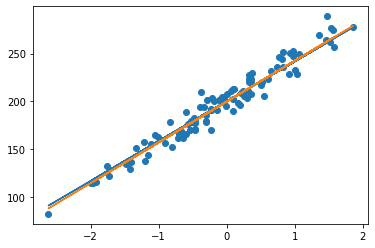

In [20]:
plt.scatter(X, y)
plt.plot(X, y_gen)
plt.plot(X, model2.predict(X))


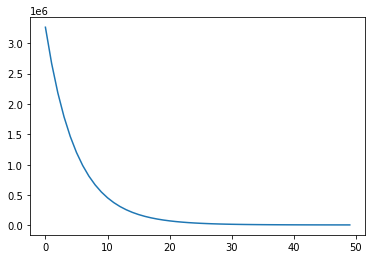

In [21]:
plt.plot(error)

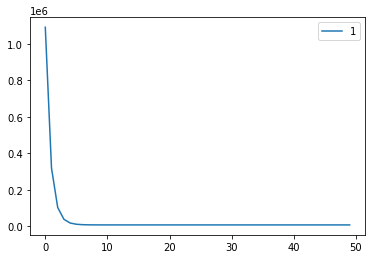

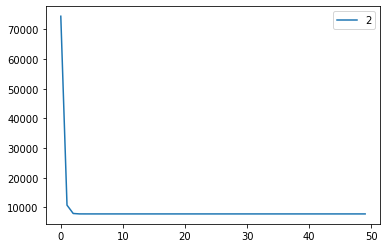

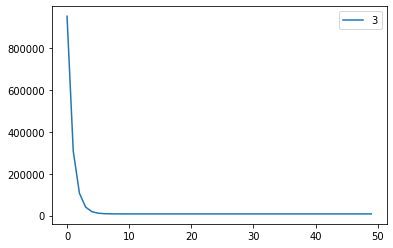

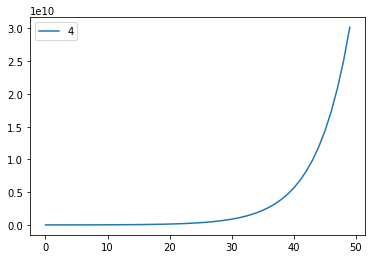

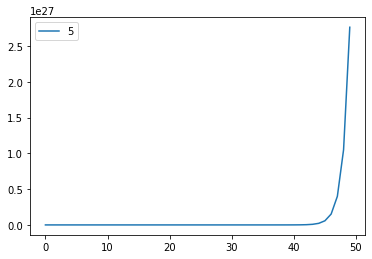

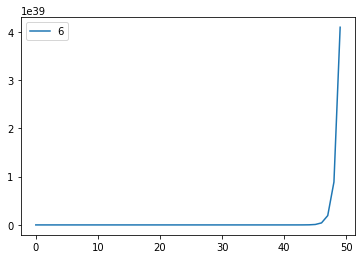

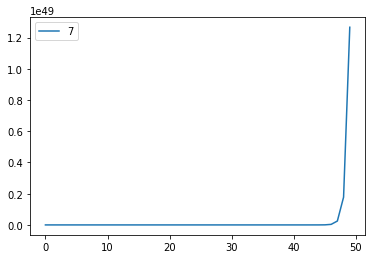

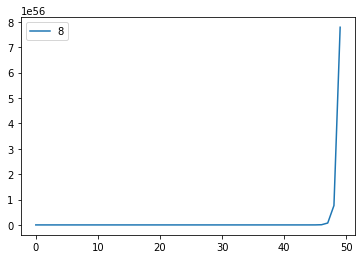

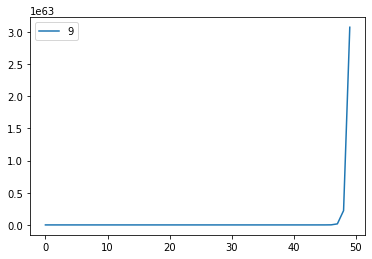

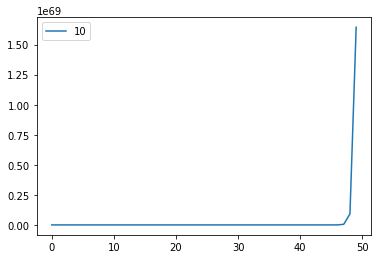

In [22]:
for i in range(1, 11):
    model=LinearRegCustom(lr=.5 * i)
    errors=model.fit(X, y)
    plt.figure()
    plt.plot(errors, label=i)
    plt.legend()



# House Pricing DataSet

In [23]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [24]:
X, y=load_boston(return_X_y=True)

C:\Users\Aman\AppData\Local\Programs\Python\Python39-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

In [25]:
boston = load_boston()

In [26]:
X.shape, y.shape

((506, 13), (506,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339,), (167,))

In [29]:
model=LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
model.predict(X_test[:1])

array([28.53469469])

In [32]:
y_test[:1]

array([23.6])

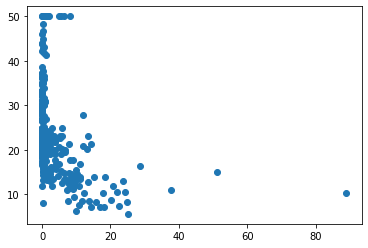

In [33]:
plt.scatter(X_train[:,0], y_train)

In [34]:
a=pd.DataFrame(X_train)
a.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,3.351324,11.716814,11.261858,0.076696,0.557498,6.327324,68.940118,3.762468,9.483776,409.132743,18.261652,358.431475,12.497611
std,7.689661,22.981007,6.968227,0.266502,0.117683,0.720720,27.951508,2.144554,8.668221,166.318304,2.245681,88.600864,7.181030
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082100,0.000000,5.130000,0.000000,0.448000,5.890000,45.650000,2.058100,4.000000,280.500000,16.600000,376.355000,6.880000
50%,0.259150,0.000000,9.900000,0.000000,0.538000,6.229000,78.100000,3.102500,5.000000,335.000000,18.600000,391.500000,10.970000
75%,3.397665,20.000000,18.100000,0.000000,0.631000,6.705500,93.900000,5.400700,24.000000,666.000000,20.200000,396.220000,16.410000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# salary data set

In [35]:
data=pd.read_csv("E:\\dataset for practice\\Salary_Data.csv")

In [36]:
# data.drop(columns=["Age"], inplace=True)

In [37]:
data.head()


,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [38]:
X_new = data.iloc[:,:-1].values
y_new = data.iloc[:, -1].values

# X_new=X_new.reshape(-1, 1)

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=0.33, random_state=42)


In [40]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape

((20, 2), (10, 2), (20,), (10,))

In [41]:
model3 = LinearRegression()


In [42]:
model3.fit(X_train2, y_train2)
# y_test2.reshape(-1, 1)

LinearRegression()

In [43]:
model3.predict(X_test[:5])

ValueError: X has 13 features, but LinearRegression is expecting 2 features as input.

In [44]:
y_test2[:5]

array([112635,  67938, 113812,  83088,  64445], dtype=int64)

In [45]:
model3.score(X_test2, y_test2)

0.9530948243580308

In [46]:
yrs=float(input("enter how many experience you have ?"))
output=model3.predict(np.array([yrs]).reshape(-1,1))
print(output[0])

enter how many experience you have ?


ValueError: could not convert string to float: ''

In [47]:
class CustomKnn:
    name="aman"
    def __init__(self, name, age):
        self.name = name
        self.age = [12,14,15,67,89]
    def cvv(self):
        print("hello my name is", self.name)
    @staticmethod
    def tt():
        print("hello !")

In [48]:
a=CustomKnn("as", 12)

In [49]:
a.cvv()
CustomKnn.cvv(a)
a.tt()

hello my name is as
hello my name is as
hello !


In [50]:
class Calculator:
    def __init__(self, x, y):
        
        self.number=x
        self.number2=y
    def adds(self):
        print(f"addition is {self.number+self.number2}")
    def sub(self):
        print(f"addition is {self.number+self.number2}")
        
    def square(self):
        print(f"addition is {self.number*self.number}")
    

In [51]:
model = Calculator(12, 13)

model.adds()
model.square()
model.sub()

addition is 25
addition is 144
addition is 25


In [52]:
class Programmer:
    company="Google"
    def __init__(self, name, age, product):
        self.name = name
        self.age = age
        self.product = product
    def getd(self):
        print(f" the name is employee is {self.name} age is {self.age} product is {self.product}" )

In [53]:
aman = Programmer("aman", 19, "Spotify")
dev = Programmer("dev", 19, "Youtube")

In [54]:
aman.getd()
dev.getd()

 the name is employee is aman age is 19 product is Spotify
 the name is employee is dev age is 19 product is Youtube


In [55]:
def fact(n):
    if n==1:
        return 1
    else: 
        return n *fact(n-1)
    

In [56]:
def vvg(n):
    

IndentationError: expected an indented block (Temp/ipykernel_6660/2647369551.py, line 2)

In [57]:
f=1
n=5
for i in range(1,n+1):
        f=f*i
print(f)
        

120


In [58]:
class Railway:
    def __init__(self, name, train, ticket):
        self.name = name
        self.train = train
        self.ticket = ticket
    def show_ticket(self):
        print(f"all ticket available {self.ticket}")
    def show_detail(self):
        print(f"name is {self.name} train name is {self.train} ticket available {self.ticket}")
    def show_train(self):
        print(f"train is {self.train}")
    def book_ticket(self):
        if (self.ticket > 0):
            self.ticket = self.ticket -1
        else:
            print("Sorry No tickets !", self.ticket)

In [59]:
aman=Railway("aman", "gorkhdham", 10)

In [60]:
aman.show_detail()
aman.show_train()
aman.book_ticket()
aman.book_ticket()
aman.show_ticket()

name is aman train name is gorkhdham ticket available 10
train is gorkhdham
all ticket available 8


In [81]:
class LinearRegCustom:
    def __init__(self, lr=.1):
        self.lr=lr
    
    
    def fit(self, X, y):
        self._X = X
        self._y = y.reshape(-1, 1)
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        # gredient decent
        error=[]
        
        for i in range(50):
            self.gredient_decent()
            error.append(self.error())
        return error
    def gredient_decent(self):
        d_coef , d_intercept = self.gredient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
        
        
    def gredient(self):
        yh = self.predict(self._X)
        d_coef = ((yh-self._y) *self._X).mean()
        d_intercept = (yh-self._y).mean()
        
    def predict(self, X):
        return X * self.coef_ + self.intercept_
        
        
    def error(self):
        return ((self.predict(self._X) - self._y)**2).sum()
        
    
    
        

In [82]:
model4=LinearRegCustom(lr=0.2)


In [83]:
X, y ,coef = make_regression(n_features=1, bias=bias, noise=10, coef=True, random_state=42)

In [84]:
model4.fit(X, y)

TypeError: cannot unpack non-iterable NoneType object